In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['myntra_products_catalog.csv']))
df.head()


Saving myntra_products_catalog.csv to myntra_products_catalog.csv


,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price_(INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [ ]:
df.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [ ]:
df.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price_(INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [ ]:
# Fill missing values in PrimaryColor with a placeholder
df['PrimaryColor'].fillna('Unknown', inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['PrimaryColor'] = le.fit_transform(df['PrimaryColor'])


In [ ]:
!pip install dash dash-bootstrap-components plotly


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 23.1 MB/s eta 0:00:00


In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output
import plotly.express as px

<ipython-input-10-672c95f44498>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-10-672c95f44498>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [ ]:
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

In [ ]:
# Bar chart for product demand
product_demand = df['ProductName'].value_counts().reset_index()
product_demand.columns = ['ProductName', 'Count']
fig_demand = px.bar(product_demand, x='ProductName', y='Count', title='Product Demand')

In [ ]:
# Pie chart for color preference
color_preference = df['PrimaryColor'].value_counts().reset_index()
color_preference.columns = ['PrimaryColor', 'Count']
fig_color = px.pie(color_preference, names='PrimaryColor', values='Count', title='Color Preference')

In [ ]:
# Bar chart for gender preference
gender_preference = df['Gender'].value_counts().reset_index()
gender_preference.columns = ['Gender', 'Count']
gender_preference['Gender'] = gender_preference['Gender'].replace({0: 'Men', 1: 'Women', 2: 'Unisex'})
fig_gender = px.bar(gender_preference, x='Gender', y='Count', title='Gender Preference')

In [ ]:
# Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("Fashion Trends Dashboard", className='text-center text-primary mb-4'), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='demand-graph', figure=fig_demand), width=12)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='color-graph', figure=fig_color), width=6),
        dbc.Col(dcc.Graph(id='gender-graph', figure=fig_gender), width=6)
    ])
])


In [ ]:
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
# Remove rows with missing values in 'PrimaryColor'
df = df.dropna(subset=['PrimaryColor'])

# Convert columns to string type and strip whitespace
for col in ['ProductID', 'ProductName', 'ProductBrand', 'Description', 'PrimaryColor']:
    df[col] = df[col].astype(str).str.strip()

# Check for duplicates based on 'ProductID' and remove them
df = df.drop_duplicates(subset=['ProductID'])

# Show the first few rows of the cleaned dataframe
df.head()


,ProductID,ProductName,ProductBrand,Gender,Price_(INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,3,11745,7,"Black and grey printed medium trolley bag, sec...",1
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,5,5810,7,Beige & Grey made to measure kurta with churid...,0
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,5,899,7,Pink coloured wash 5-pocket high-rise cropped ...,18
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,2,5599,5,Blue self-design bandhgala suitBlue self-desig...,26
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,2,759,5,"Brown and off-white printed casual shirt, has ...",24


In [ ]:
import matplotlib.pyplot as plt

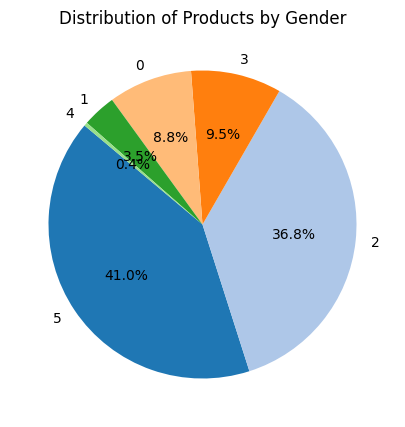

In [ ]:
# Calculate the distribution of products by gender
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20(range(len(labels))))
plt.title('Distribution of Products by Gender')
plt.show()


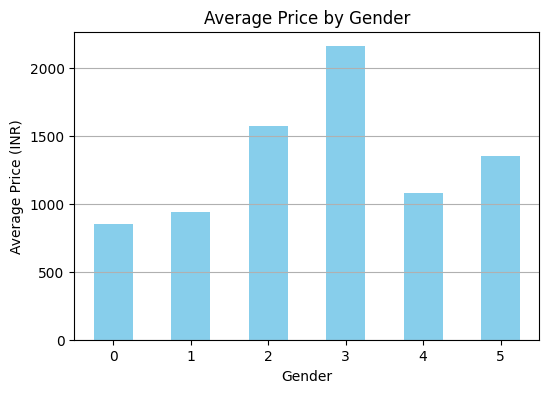

In [ ]:
# Calculate average price by gender
average_price_by_gender = df.groupby('Gender')['Price_(INR)'].mean()

# Plotting average price by gender
plt.figure(figsize=(6, 4))
average_price_by_gender.plot(kind='bar', color='skyblue')
plt.title('Average Price by Gender')
plt.ylabel('Average Price (INR)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


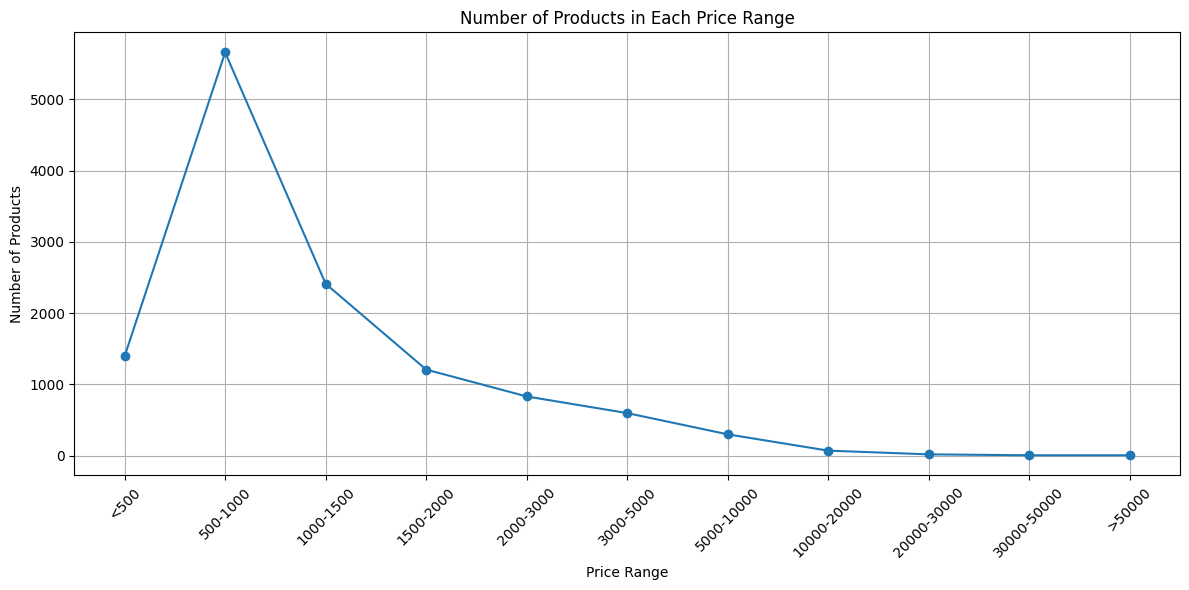

In [ ]:
# Define price ranges for grouping
price_bins = [0, 500, 1000, 1500, 2000, 3000, 5000, 10000, 20000, 30000, 50000, float('inf')]
price_labels = ['<500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000-5000', '5000-10000',
                '10000-20000', '20000-30000', '30000-50000', '>50000']

# Bin the 'Price (INR)' data
df['PriceRange'] = pd.cut(df['Price_(INR)'], bins=price_bins, labels=price_labels, right=False)

# Count the number of products in each price range
price_range_counts = df['PriceRange'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(12, 6))
price_range_counts.plot(kind='line', marker='o')

plt.title('Number of Products in Each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(range(len(price_labels)), price_labels, rotation=45)
plt.tight_layout()
plt.grid()

plt.show()


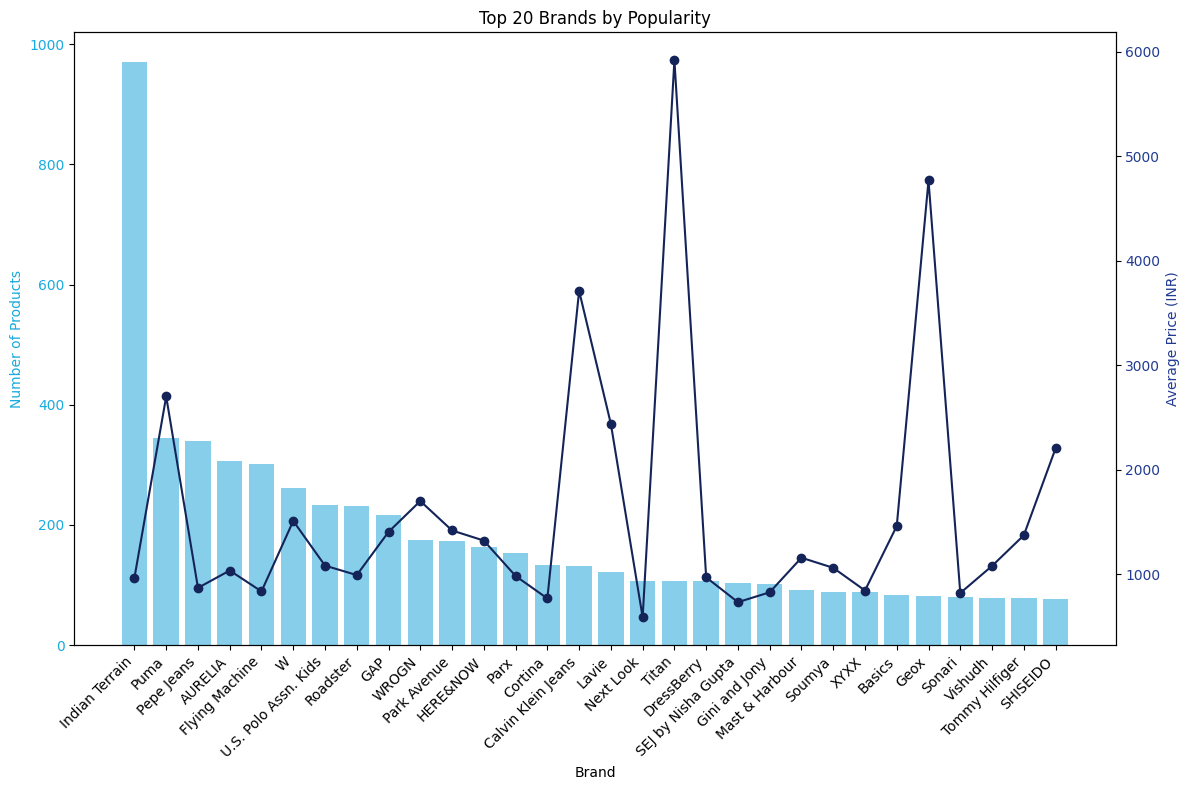

In [ ]:
# Brand popularity analysis
top_brands = df['ProductBrand'].value_counts().head(30).index
brand_counts = df['ProductBrand'].value_counts().head(30)

# Calculate average price for each of the top 20 brands
avg_prices = df[df['ProductBrand'].isin(top_brands)].groupby('ProductBrand')['Price_(INR)'].mean().reindex(top_brands)

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar graph for number of products
color="skyblue"
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Products', color='#19aade')
ax1.bar(brand_counts.index, brand_counts.values, color=color)
ax1.tick_params(axis='y', labelcolor='#19aade')
ax1.set_xticks(range(len(brand_counts.index)))
ax1.set_xticklabels(brand_counts.index, rotation=45, ha='right')

# Line graph for average price
ax2 = ax1.twinx()
color = '#142459'
ax2.set_ylabel('Average Price (INR)', color='#213B91')
ax2.plot(avg_prices.index, avg_prices.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor='#213B91')

# Title and layout
plt.title('Top 20 Brands by Popularity')
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Filter the dataset for "Women" and "Men"
women_df = df[df['Gender'] == 'Women']
men_df = df[df['Gender'] == 'Men']

# Count occurrences of each primary color for "Women"
women_color_counts = women_df['PrimaryColor'].value_counts().head(10)

# Count occurrences of each primary color for "Men"
men_color_counts = men_df['PrimaryColor'].value_counts().head(10)

# Combine the color counts into a single DataFrame
color_counts_df = pd.DataFrame({
    'Women': women_color_counts,
    'Men': men_color_counts
}).fillna(0)  # Fill NaN values with 0 for colors not present in both genders

# Plot the grouped bar graph
color_counts_df.plot(kind='bar', figsize=(14, 8), color=['#B73377', '#6DD2FF'], width=0.8)
plt.title('Primary Color Counts for Women and Men')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()